# Credit card application prediction using Logistic Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import statsmodels.formula.api as smf

from sklearn import metrics

import itertools
from scipy.stats import norm
from math import sqrt
import pandas_profiling


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



# Loading the Data

In [2]:
record=pd.read_csv("D:\\creditcardprediction\credit_record.csv")
record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [3]:
data=pd.read_csv("D:\\application_record.csv")
data.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [4]:
df=pd.read_csv("D:\\application_record.csv")
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [5]:
datas=pd.read_csv("D:\\application_record.csv")
datas.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [6]:
data.shape

(438557, 18)

# H

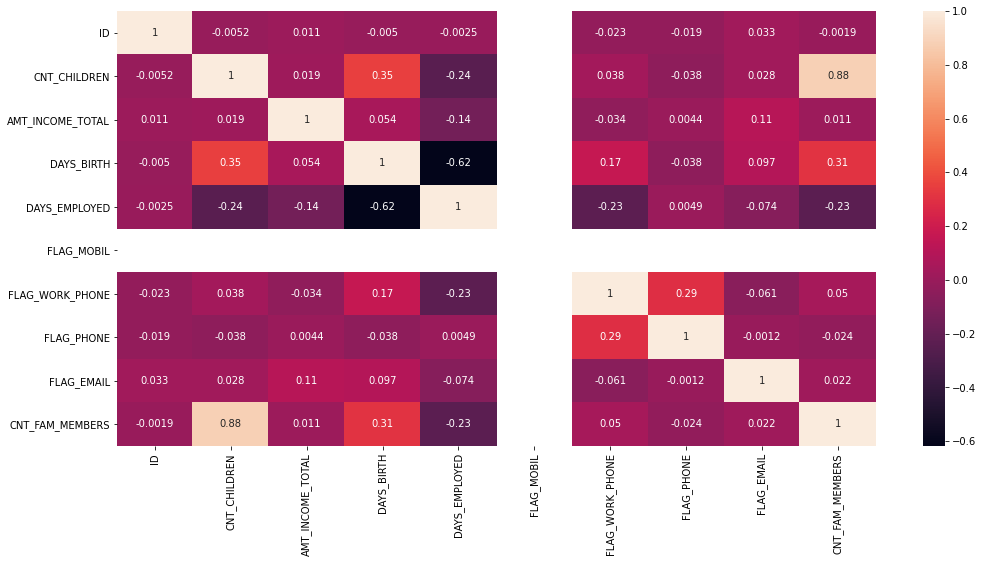

In [7]:
fig, ax = plt.subplots(figsize = (17,8))
corr = data.corr()
ax = sns.heatmap(corr, annot=True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
data.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [10]:
data.head().T

0                 1  \
ID                            5008804           5008805   
CODE_GENDER                         M                 M   
FLAG_OWN_CAR                        Y                 Y   
FLAG_OWN_REALTY                     Y                 Y   
CNT_CHILDREN                        0                 0   
AMT_INCOME_TOTAL               427500            427500   
NAME_INCOME_TYPE              Working           Working   
NAME_EDUCATION_TYPE  Higher education  Higher education   
NAME_FAMILY_STATUS     Civil marriage    Civil marriage   
NAME_HOUSING_TYPE    Rented apartment  Rented apartment   
DAYS_BIRTH                     -12005            -12005   
DAYS_EMPLOYED                   -4542             -4542   
FLAG_MOBIL                          1                 1   
FLAG_WORK_PHONE                     1                 1   
FLAG_PHONE                          0                 0   
FLAG_EMAIL                          0                 0   
OCCUPATION_TYPE                   NaN               NaN   
CNT_FAM_MEMBERS                     2                 2   

                                                 2  \
ID                                         5008806   
CODE_GENDER                                      M   
FLAG_OWN_CAR                                     Y   
FLAG_OWN_REALTY                                  Y   
CNT_CHILDREN                                     0   
AMT_INCOME_TOTAL                            112500   
NAME_INCOME_TYPE                           Working   
NAME_EDUCATION_TYPE  Secondary / secondary special   
NAME_FAMILY_STATUS                         Married   
NAME_HOUSING_TYPE                House / apartment   
DAYS_BIRTH                                  -21474   
DAYS_EMPLOYED                                -1134   
FLAG_MOBIL                                       1   
FLAG_WORK_PHONE                                  0   
FLAG_PHONE                                       0   
FLAG_EMAIL                                       0   
OCCUPATION_TYPE                     Security staff   
CNT_FAM_MEMBERS                                  2   

                                                 3  \
ID                                         5008808   
CODE_GENDER                                      F   
FLAG_OWN_CAR                                     N   
FLAG_OWN_REALTY                                  Y   
CNT_CHILDREN                                     0   
AMT_INCOME_TOTAL                            270000   
NAME_INCOME_TYPE              Commercial associate   
NAME_EDUCATION_TYPE  Secondary / secondary special   
NAME_FAMILY_STATUS            Single / not married   
NAME_HOUSING_TYPE                House / apartment   
DAYS_BIRTH                                  -19110   
DAYS_EMPLOYED                                -3051   
FLAG_MOBIL                                       1   
FLAG_WORK_PHONE                                  0   
FLAG_PHONE                                       1   
FLAG_EMAIL                                       1   
OCCUPATION_TYPE                        Sales staff   
CNT_FAM_MEMBERS                                  1   

                                                 4  
ID                                         5008809  
CODE_GENDER                                      F  
FLAG_OWN_CAR                                     N  
FLAG_OWN_REALTY                                  Y  
CNT_CHILDREN                                     0  
AMT_INCOME_TOTAL                            270000  
NAME_INCOME_TYPE              Commercial associate  
NAME_EDUCATION_TYPE  Secondary / secondary special  
NAME_FAMILY_STATUS            Single / not married  
NAME_HOUSING_TYPE                House / apartment  
DAYS_BIRTH                                  -19110  
DAYS_EMPLOYED                                -3051  
FLAG_MOBIL                                       1  
FLAG_WORK_PHONE                                  0  
FLAG_PHONE                                       1  
FLAG_EMAIL  

In [11]:
#Deal with missing data using pandas profiling
pandas_profiling.ProfileReport(data)

In [13]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:>

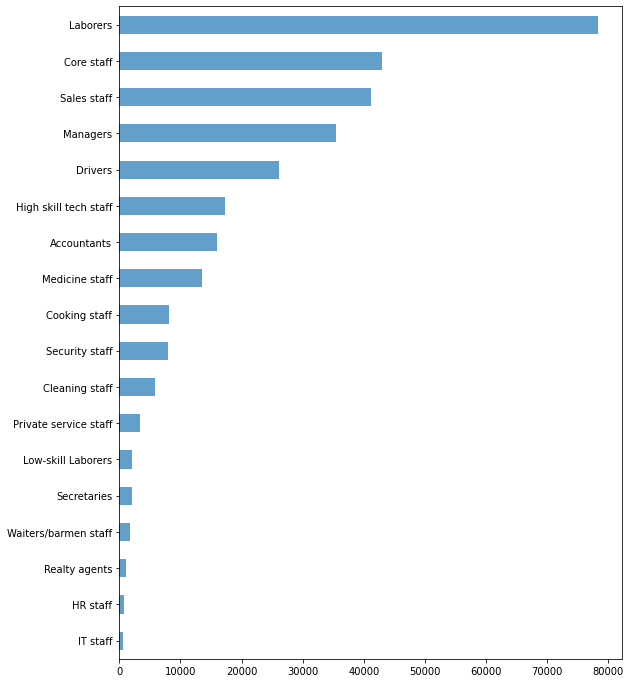

In [14]:
data['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind='barh', figsize=(9,12), alpha=0.7)

In [15]:
#Decide the cut off criterion in customer_record table for customers to be treated as defaulters or non-defaulters
record.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [16]:
# how many customers instances are there when customer had no loan (20% approx)
record.loc[record['STATUS'] == 'X'].shape[0]/record.shape[0]

0.1995374675154376

In [17]:
# how many customers instances are there when customer had paid off (42% approx)
record.loc[record['STATUS'] == 'C'].shape[0]/record.shape[0]

0.42155401378060703

In [18]:
#so we are left with approx 40% customer months when a customer credit score is 0 to 5. looks like a fairly balanced data
#it is balanced if you consider all codes 0 to 5 as belonging to another class (default). if you select just 3 to 5 for example then the dataset is highly imbalanced
record['STATUS'].value_counts()/record.shape[0]*100


C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [19]:
# code for all defaulters in credit_record. lets say that those who defaulted on their installment by more than 0 days is a defaulter
defaulter_codes= ['0','1','2','3','4','5']

In [20]:
# data labelling. 1 is a defaulter 0 is not
record['Label'] = np.where(record.STATUS.isin(defaulter_codes), 1, 0)

In [21]:
record.head(10)


ID  MONTHS_BALANCE STATUS  Label
0  5001711               0      X      0
1  5001711              -1      0      1
2  5001711              -2      0      1
3  5001711              -3      0      1
4  5001712               0      C      0
5  5001712              -1      C      0
6  5001712              -2      C      0
7  5001712              -3      C      0
8  5001712              -4      C      0
9  5001712              -5      C      0

In [22]:
record.head()

ID  MONTHS_BALANCE STATUS  Label
0  5001711               0      X      0
1  5001711              -1      0      1
2  5001711              -2      0      1
3  5001711              -3      0      1
4  5001712               0      C      0

In [23]:
record['Label'].value_counts()

0    651261
1    397314
Name: Label, dtype: int64

In [24]:
# find all users' account open month.
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(data,begin_month,how="left",on="ID") #merge to record data

In [25]:
record['def_value'] = None
record['def_value'][record['STATUS'] =='2']='Yes' 
record['def_value'][record['STATUS'] =='3']='Yes' 
record['def_value'][record['STATUS'] =='4']='Yes' 
record['def_value'][record['STATUS'] =='5']='Yes'

In [26]:
cpunt=record.groupby('ID').count()
cpunt['def_value'][cpunt['def_value'] > 0]='Yes' 
cpunt['def_value'][cpunt['def_value'] == 0]='No' 
cpunt = cpunt[['def_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['def_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

In [27]:
print(cpunt['def_value'].value_counts())
cpunt['def_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: def_value, dtype: int64


No     0.985495
Yes    0.014505
Name: def_value, dtype: float64

In [28]:
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [29]:
new_data.dropna()
new_data = new_data.mask(new_data == 'NULL').dropna()

In [30]:
ivtable=pd.DataFrame(new_data.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

In [31]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [32]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [33]:
def calc_woe(feature, target):
    lst = []
    feature = feature.fillna("NULL")
    
    if len(feature.unique()) > 10:
        raise ValueError('This method currently only supports categorical features with cardinality less than 10')
    
    for group in list(feature.unique()):
        good = len(feature[(feature == group) & (target == 0)])
        bad = len(feature[(feature == group) & (target == 1)])
        lst.append([group, good, bad])

    data = pd.DataFrame(lst, columns=['Group', 'Good', 'Bad'])
    data['Distribution Good'] = data['Good'] / data['Good'].sum()
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    return data

In [34]:
def woe_transform(feature_train, feature_test, target_train):
    feature_train = feature_train.copy()
    feature_test = feature_test.copy()
    target_train = target_train.copy()
    
    result = calc_woe(feature_train, target_train)
    
    for i in range(len(result)):
        feature_train[feature_train == result.iloc[i]['Group']] = result.iloc[i]['WoE']
        feature_test[feature_test == result.iloc[i]['Group']] = result.iloc[i]['WoE']
        
    return feature_train, feature_test

In [35]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [36]:
new_data['Gender'] = new_data['Gender'].replace(['F','M'],[0,1])
print(new_data['Gender'].value_counts())
iv, data = calc_iv(new_data,'Gender','target')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

0    15630
1     9504
Name: Gender, dtype: int64
This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


Variable  Value    All   Good  Bad     Share  Bad Rate  Distribution Good  \
0   Gender      0  15630  15400  230  0.621867  0.014715           0.623179   
1   Gender      1   9504   9312  192  0.378133  0.020202           0.376821   

   Distribution Bad       WoE        IV  
0          0.545024  0.134005  0.010473  
1          0.454976 -0.188475  0.014730

In [37]:
#Having a car or not
new_data['Car'] = new_data['Car'].replace(['N','Y'],[0,1])
print(new_data['Car'].value_counts())
iv, data=calc_iv(new_data,'Car','target')
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()

0    14618
1    10516
Name: Car, dtype: int64
This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


Variable  Value    All   Good  Bad     Share  Bad Rate  Distribution Good  \
0      Car      0  14618  14373  245  0.581603  0.016760            0.58162   
1      Car      1  10516  10339  177  0.418397  0.016831            0.41838   

   Distribution Bad      WoE        IV  
0          0.580569  0.00181  0.000002  
1          0.419431 -0.00251  0.000003

In [38]:
#Having house reality or not
new_data['Reality'] = new_data['Reality'].replace(['N','Y'],[0,1])
print(new_data['Reality'].value_counts())
iv, data=calc_iv(new_data,'Reality','target')
ivtable.loc[ivtable['variable']=='Reality','IV']=iv
data.head()

1    16461
0     8673
Name: Reality, dtype: int64
This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Reality, dtype: int64


Variable  Value    All   Good  Bad    Share  Bad Rate  Distribution Good  \
0  Reality      0   8673   8494  179  0.34507  0.020639            0.34372   
1  Reality      1  16461  16218  243  0.65493  0.014762            0.65628   

   Distribution Bad       WoE        IV  
0          0.424171 -0.210309  0.016920  
1          0.575829  0.130777  0.010521

In [39]:
#Having a phone or not
new_data['phone']=new_data['phone'].astype(str)
print(new_data['phone'].value_counts(normalize=True,sort=False))
new_data.drop(new_data[new_data['phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(new_data,'phone','target')
ivtable.loc[ivtable['variable']=='phone','IV']=iv
data.head()

1    0.292791
0    0.707209
Name: phone, dtype: float64
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


Variable Value    All   Good  Bad     Share  Bad Rate  Distribution Good  \
0    phone     0  17775  17481  294  0.707209  0.016540           0.707389   
1    phone     1   7359   7231  128  0.292791  0.017394           0.292611   

   Distribution Bad       WoE        IV  
0          0.696682  0.015251  0.000163  
1          0.303318 -0.035937  0.000385

In [40]:
#Having an email or not
print(new_data['email'].value_counts(normalize=True,sort=False))
new_data['email']=new_data['email'].astype(str)
iv, data=calc_iv(new_data,'email','target')
ivtable.loc[ivtable['variable']=='email','IV']=iv
data.head()

0    0.89934
1    0.10066
Name: email, dtype: float64
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


Variable Value    All   Good  Bad    Share  Bad Rate  Distribution Good  \
0    email     0  22604  22225  379  0.89934  0.016767           0.899361   
1    email     1   2530   2487   43  0.10066  0.016996           0.100639   

   Distribution Bad       WoE        IV  
0          0.898104  0.001398  0.000002  
1          0.101896 -0.012407  0.000016

In [41]:
new_data.loc[new_data['ChldNo'] >= 2,'ChldNo']='2More'
print(new_data['ChldNo'].value_counts(sort=False))

0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


In [42]:
iv, data=calc_iv(new_data,'ChldNo','target')
ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
data.head()

This variable's IV is: 0.0011214542503301935
0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


Variable  Value    All   Good  Bad     Share  Bad Rate  Distribution Good  \
0   ChldNo      0  15908  15635  273  0.632928  0.017161           0.632689   
1   ChldNo      1   6118   6021   97  0.243415  0.015855           0.243647   
2   ChldNo  2More   3108   3056   52  0.123657  0.016731           0.123665   

   Distribution Bad       WoE        IV  
0          0.646919 -0.022243  0.000317  
1          0.229858  0.058259  0.000803  
2          0.123223  0.003580  0.000002

(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: inc, dtype: int64


<AxesSubplot:ylabel='Frequency'>

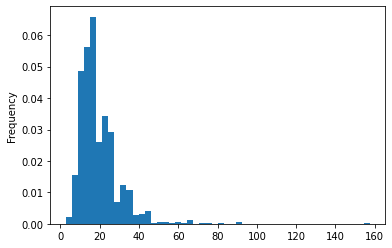

In [43]:
#Annual Income
#bins the data based on sample quantiles
new_data['inc']=new_data['inc'].astype(object)
new_data['inc'] = new_data['inc']/10000 
print(new_data['inc'].value_counts(bins=10,sort=False))
new_data['inc'].plot(kind='hist',bins=50,density=True)

In [44]:
new_data = get_category(new_data,'inc', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv(new_data,'gp_inc','target')
ivtable.loc[ivtable['variable']=='inc','IV']=iv
data.head()

This variable's IV is: 0.0024219962221596752
low       8996
high      8244
medium    7894
Name: gp_inc, dtype: int64


Variable   Value   All  Good  Bad     Share  Bad Rate  Distribution Good  \
0   gp_inc    high  8244  8096  148  0.328002  0.017952           0.327614   
1   gp_inc     low  8996  8849  147  0.357922  0.016341           0.358085   
2   gp_inc  medium  7894  7767  127  0.314077  0.016088           0.314301   

   Distribution Bad       WoE        IV  
0          0.350711 -0.068126  0.001573  
1          0.348341  0.027588  0.000269  
2          0.300948  0.043413  0.000580

In [45]:
new_data = convert_dummy(new_data,'gp_inc')

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

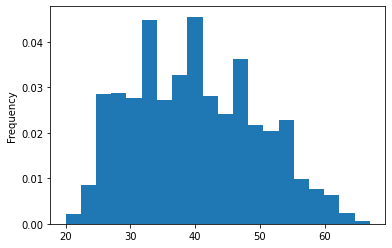

In [46]:
new_data['Age']=-(new_data['DAYS_BIRTH'])//365	
print(new_data['Age'].value_counts(bins=10,normalize=True,sort=False))
new_data['Age'].plot(kind='hist',bins=20,density=True)

In [47]:
new_data = get_category(new_data,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_data,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


Variable    Value   All  Good  Bad     Share  Bad Rate  Distribution Good  \
0   gp_Age     high  4414  4323   91  0.175619  0.020616           0.174935   
1   gp_Age  highest   993   989    4  0.039508  0.004028           0.040021   
2   gp_Age      low  7806  7686  120  0.310575  0.015373           0.311023   
3   gp_Age   lowest  4005  3921   84  0.159346  0.020974           0.158668   
4   gp_Age   medium  7916  7793  123  0.314952  0.015538           0.315353   

   Distribution Bad       WoE        IV  
0          0.215640 -0.209194  0.008515  
1          0.009479  1.440361  0.043992  
2          0.284360  0.089625  0.002390  
3          0.199052 -0.226754  0.009157  
4          0.291469  0.078758  0.001881

In [48]:
new_data = convert_dummy(new_data,'gp_Age')

<AxesSubplot:ylabel='Frequency'>

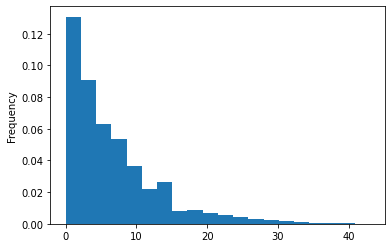

In [49]:
new_data['worktm']=-(new_data['DAYS_EMPLOYED'])//365	
new_data[new_data['worktm']<0] = np.nan # replace by na
new_data['DAYS_EMPLOYED']
new_data['worktm'].fillna(new_data['worktm'].mean(),inplace=True) #replace na by mean
new_data['worktm'].plot(kind='hist',bins=20,density=True)

In [50]:
new_data = get_category(new_data,'worktm',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv(new_data,'gp_worktm','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


Variable    Value    All   Good  Bad     Share  Bad Rate  \
0  gp_worktm     high    425    423    2  0.016909  0.004706   
1  gp_worktm  highest     90     90    0  0.003581  0.000000   
2  gp_worktm      low   4987   4921   66  0.198416  0.013234   
3  gp_worktm   lowest  18254  17916  338  0.726267  0.018516   
4  gp_worktm   medium   1378   1362   16  0.054826  0.011611   

   Distribution Good  Distribution Bad       WoE        IV  
0           0.017117          0.004739  1.284186  0.015895  
1           0.003642          0.000000  0.000000  0.000000  
2           0.199134          0.156398  0.241573  0.010324  
3           0.724992          0.800948 -0.099635  0.007568  
4           0.055115          0.037915  0.374082  0.006434

In [51]:
new_data = convert_dummy(new_data,'gp_worktm')

In [52]:
new_data['famsize'].value_counts(sort=False)

2.0     12697
1.0      4263
3.0      5216
4.0      2576
6.0        51
9.0         2
5.0       307
7.0        18
20.0        1
15.0        3
Name: famsize, dtype: int64

In [53]:
new_data['famsize']=new_data['famsize'].astype(int)
new_data['famsizegp']=new_data['famsize']
new_data['famsizegp']=new_data['famsizegp'].astype(object)
new_data.loc[new_data['famsizegp']>=3,'famsizegp']='3more'
iv, data=calc_iv(new_data,'famsizegp','target')
ivtable.loc[ivtable['variable']=='famsize','IV']=iv
data.head()

This variable's IV is: 0.006156138510778323
2        12697
3more     8174
1         4263
Name: famsizegp, dtype: int64


Variable  Value    All   Good  Bad     Share  Bad Rate  Distribution Good  \
0  famsizegp      1   4263   4179   84  0.169611  0.019704           0.169108   
1  famsizegp      2  12697  12489  208  0.505172  0.016382           0.505382   
2  famsizegp  3more   8174   8044  130  0.325217  0.015904           0.325510   

   Distribution Bad       WoE        IV  
0          0.199052 -0.163028  0.004882  
1          0.492891  0.025027  0.000313  
2          0.308057  0.055108  0.000962

In [54]:
new_data = convert_dummy(new_data,'famsizegp')

In [55]:
#Income Type
print(new_data['inctp'].value_counts(sort=False))
print(new_data['inctp'].value_counts(normalize=True,sort=False))
new_data.loc[new_data['inctp']=='Pensioner','inctp']='State servant'
new_data.loc[new_data['inctp']=='Student','inctp']='State servant'
iv, data=calc_iv(new_data,'inctp','target')
ivtable.loc[ivtable['variable']=='inctp','IV']=iv
data.head()

Commercial associate     7052
Working                 15622
State servant            2437
Student                    10
Pensioner                  13
Name: inctp, dtype: int64
Commercial associate    0.280576
Working                 0.621549
State servant           0.096960
Student                 0.000398
Pensioner               0.000517
Name: inctp, dtype: float64
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


Variable                 Value    All   Good  Bad     Share  Bad Rate  \
0    inctp  Commercial associate   7052   6933  119  0.280576  0.016875   
1    inctp         State servant   2460   2418   42  0.097875  0.017073   
2    inctp               Working  15622  15361  261  0.621549  0.016707   

   Distribution Good  Distribution Bad       WoE        IV  
0           0.280552          0.281991 -0.005115  0.000007  
1           0.097847          0.099526 -0.017013  0.000029  
2           0.621601          0.618483  0.005028  0.000016

In [56]:
new_data = convert_dummy(new_data,'inctp')

In [57]:
new_data.loc[(new_data['occyp']=='Cleaning staff') | (new_data['occyp']=='Cooking staff') | (new_data['occyp']=='Drivers') | (new_data['occyp']=='Laborers') | (new_data['occyp']=='Low-skill Laborers') | (new_data['occyp']=='Security staff') | (new_data['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
new_data.loc[(new_data['occyp']=='Accountants') | (new_data['occyp']=='Core staff') | (new_data['occyp']=='HR staff') | (new_data['occyp']=='Medicine staff') | (new_data['occyp']=='Private service staff') | (new_data['occyp']=='Realty agents') | (new_data['occyp']=='Sales staff') | (new_data['occyp']=='Secretaries'),'occyp']='officewk'
new_data.loc[(new_data['occyp']=='Managers') | (new_data['occyp']=='High skill tech staff') | (new_data['occyp']=='IT staff'),'occyp']='hightecwk'
print(new_data['occyp'].value_counts())
iv, data=calc_iv(new_data,'occyp','target')
ivtable.loc[ivtable['variable']=='occyp','IV']=iv
data.head() 

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


Variable      Value    All   Good  Bad     Share  Bad Rate  \
0    occyp    Laborwk  10496  10311  185  0.417602  0.017626   
1    occyp  hightecwk   4455   4375   80  0.177250  0.017957   
2    occyp   officewk  10183  10026  157  0.405148  0.015418   

   Distribution Good  Distribution Bad       WoE        IV  
0           0.417247          0.438389 -0.049428  0.001045  
1           0.177039          0.189573 -0.068404  0.000857  
2           0.405714          0.372038  0.086652  0.002918

In [58]:
new_data = convert_dummy(new_data,'occyp')

In [59]:
iv, data=calc_iv(new_data,'houtp','target')
ivtable.loc[ivtable['variable']=='houtp','IV']=iv
data.head()

This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


Variable                Value    All   Good  Bad     Share  Bad Rate  \
0    houtp      Co-op apartment    152    149    3  0.006048  0.019737   
1    houtp    House / apartment  22102  21738  364  0.879367  0.016469   
2    houtp  Municipal apartment    812    793   19  0.032307  0.023399   
3    houtp     Office apartment    199    194    5  0.007918  0.025126   
4    houtp     Rented apartment    439    433    6  0.017466  0.013667   

   Distribution Good  Distribution Bad       WoE        IV  
0           0.006029          0.007109 -0.164705  0.000178  
1           0.879654          0.862559  0.019624  0.000335  
2           0.032090          0.045024 -0.338655  0.004380  
3           0.007850          0.011848 -0.411619  0.001646  
4           0.017522          0.014218  0.208939  0.000690

In [60]:
new_data = convert_dummy(new_data,'houtp')

In [61]:
new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
iv, data=calc_iv(new_data,'edutp','target')
ivtable.loc[ivtable['variable']=='edutp','IV']=iv
data.head()

This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


Variable                          Value    All   Good  Bad     Share  \
0    edutp               Higher education   7146   7018  128  0.284316   
1    edutp              Incomplete higher    993    972   21  0.039508   
2    edutp                Lower secondary    187    181    6  0.007440   
3    edutp  Secondary / secondary special  16808  16541  267  0.668736   

   Bad Rate  Distribution Good  Distribution Bad       WoE        IV  
0  0.017912           0.283992          0.303318 -0.065836  0.001272  
1  0.021148           0.039333          0.049763 -0.235206  0.002453  
2  0.032086           0.007324          0.014218 -0.663301  0.004573  
3  0.015885           0.669351          0.632701  0.056310  0.002064

In [62]:
new_data = convert_dummy(new_data,'edutp')

In [63]:
new_data['famtp'].value_counts(normalize=True,sort=False)

Widow                   0.023076
Married                 0.696626
Civil marriage          0.084865
Separated               0.058367
Single / not married    0.137065
Name: famtp, dtype: float64

In [64]:
iv, data=calc_iv(new_data,'famtp','target')
ivtable.loc[ivtable['variable']=='famtp','IV']=iv
data.head()

This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


Variable                 Value    All   Good  Bad     Share  Bad Rate  \
0    famtp        Civil marriage   2133   2101   32  0.084865  0.015002   
1    famtp               Married  17509  17232  277  0.696626  0.015820   
2    famtp             Separated   1467   1452   15  0.058367  0.010225   
3    famtp  Single / not married   3445   3362   83  0.137065  0.024093   
4    famtp                 Widow    580    565   15  0.023076  0.025862   

   Distribution Good  Distribution Bad       WoE        IV  
0           0.085019          0.075829  0.114394  0.001051  
1           0.697313          0.656398  0.060467  0.002474  
2           0.058757          0.035545  0.502608  0.011666  
3           0.136047          0.196682 -0.368588  0.022349  
4           0.022863          0.035545 -0.441263  0.005596

In [65]:
new_data = convert_dummy(new_data,'famtp')

In [66]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='agegp'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='worktmgp'
ivtable.loc[ivtable['variable']=='inc','variable']='incgp'
ivtable

variable           IV
10      agegp    0.0659351
8       famtp    0.0431371
11   worktmgp    0.0402215
3     Reality    0.0274407
1      Gender    0.0252035
7       edutp    0.0103618
9       houtp    0.0073275
17    famsize   0.00615614
16      occyp   0.00482047
5       incgp     0.002422
4      ChldNo   0.00112145
14      phone   0.00054805
6       inctp   5.1593e-05
15      email  1.73436e-05
2         Car  4.54248e-06
13    wkphone         None
19  def_value         None

In [67]:
def impute_occupation_type(application):
    
    x = application.copy()
    
    probability = x['OCCUPATION_TYPE'].value_counts().to_numpy()/x['OCCUPATION_TYPE'].value_counts().sum()
    job_list = x['OCCUPATION_TYPE'].value_counts().index.to_numpy()
    indexes = range(len(x['OCCUPATION_TYPE'].value_counts()))
    null_size = len(x[x['OCCUPATION_TYPE'].isnull()]['OCCUPATION_TYPE'])
    
    random_index = np.random.choice(a=indexes, size=null_size, p=probability)
    
    x.loc[:,'IMPUTED_OCCUPATION_TYPE'] = 0
    x.loc[x['OCCUPATION_TYPE'].isnull(),'IMPUTED_OCCUPATION_TYPE'] = 1
    x.loc[x['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE'] = job_list[random_index]

    return x

In [68]:
def create_unemployed_column(application):
    x = application.copy()
    
    x.loc[x['DAYS_EMPLOYED']<=0,'UNEMPLOYED'] = 0 
    x.loc[x['DAYS_EMPLOYED']>0,'UNEMPLOYED'] = 1 
    
    return x

# Remove outliers

In [69]:
#Remove outliers
continuous_columns = ['CNT_CHILDREN','CNT_FAM_MEMBERS','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS']
def remove_outliers(data, column):
    if column == 'DAYS_EMPLOYED':
        Q1 = data[data[column]<=0][column].quantile(0.25)
        Q3 = data[data[column]<=0][column].quantile(0.75)        
        IQR = Q3-Q1
        return data[((Q1-1.5*IQR <= data[column]) & (data[column] <= Q3+1.5*IQR)) | data[column]>0]
    else:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3-Q1
        return data[(Q1-1.5*IQR <= data[column]) & (data[column] <= Q3+1.5*IQR)]

# Skewness

In [70]:
before = datas['CNT_FAM_MEMBERS'].skew()
after = np.log(datas['CNT_FAM_MEMBERS']).skew()
print('Skewness coefficient')
print('CNT_FAM_MEMBERS ------')
print(f'Before: {before}')
print(f'After:  {after}')

before = datas['CNT_CHILDREN'].skew()
after = np.power(datas['CNT_CHILDREN'],1/7).skew()
print('CNT_CHILDREN ------')
print(f'Before: {before}')
print(f'After:  {after}')

before = datas['AMT_INCOME_TOTAL'].skew()
after = np.log(datas['AMT_INCOME_TOTAL']).skew()
print('AMT_INCOME_TOTAL ------')
print(f'Before: {before}')
print(f'After:  {after}')

# Only transform the ones < 0 (customers currently being employed)
before = datas.loc[datas['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED'].skew()
after = (-1*np.sqrt(-1*datas.loc[datas['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED'])).skew()
print('DAYS_EMPLOYED ------')
print(f'Before: {before}')
print(f'After:  {after}')

Skewness coefficient
CNT_FAM_MEMBERS ------
Before: 0.919676246825922
After:  -0.24296860459785785
CNT_CHILDREN ------
Before: 1.8069407093611092
After:  0.8526400776258171
AMT_INCOME_TOTAL ------
Before: 8.834065744752545
After:  0.15585290178039848
DAYS_EMPLOYED ------
Before: -1.751918282449407
After:  -0.6391034386829878


In [71]:
def transform_skewed_data(datas):
    x = datas.copy()
    
    x.loc[:,'CNT_FAM_MEMBERS'] = np.log(x['CNT_FAM_MEMBERS'])
    x.loc[:,'CNT_CHILDREN'] = np.power(x['CNT_CHILDREN'],1/7)
    x.loc[:,'AMT_INCOME_TOTAL'] = np.log(x['AMT_INCOME_TOTAL'])
    x.loc[datas['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']  = -1*np.sqrt(-1*x.loc[datas['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED'])
    
    return x

In [72]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE','OCCUPATION_TYPE']

def encode(features, encode_cols):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit(datas[encode_cols].dropna())
    
    x = features.copy().reset_index()
    x = x.join(pd.DataFrame(encoder.transform(x[encode_cols])))
    x = x.drop(categorical_columns,axis=1)
    return x

In [73]:
def get_credit_status(record):
    group=record.groupby('ID')
    pivot_tb =record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
    pivot_tb['open_month'] = group['MONTHS_BALANCE'].min()
    pivot_tb['end_month'] = group['MONTHS_BALANCE'].max() 
    pivot_tb['ID'] = pivot_tb.index
    pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
    pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] 
    pivot_tb.reset_index(drop = True, inplace = True)
    credit0 = record.copy()
    credit0 = pd.merge(credit0, pivot_tb, on = 'ID', how = 'left') 
    credit0=credit0[credit0['window']>=20]
    credit0['status']=np.where((credit0['STATUS']=='2')| (credit0['STATUS']=='3')|(credit0['STATUS']=='4')|(credit0['STATUS']=='5'),1,0)
    
    return credit0

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def oversampling(X, y, sampling_strategy=0.5):

    sm = SMOTE(sampling_strategy=sampling_strategy)
    X, y = sm.fit_resample(X,y)
    return X, y

def downsampling(X, y, sampling_strategy=0.5):
    us = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X, y = us.fit_resample(X,y)
    return X,y

# Data processing

In [75]:
def process_datasets(x_train, x_test, y_train, y_test, oversampling_strategy=0.5,down_sampling_strategy=0.5, transform_skewed = True, woe_cols = [], encode_cols = categorical_columns):
    """
    This function is a wrapper function for all of the preproccessing steps
    
    - x_train: unprocessed train application dataset
    _ x_test: unprocessed test application dataset
    - y_train: unprocessed train credit dataset
    - y_test : unprocessed test credit dataset
    - oversampling_factor:  oversample the positive cases by this factor (because the current label method only has 3% as positive)
    - down_sampling_amount: remove this amount of negative cases to balance positive/negative cases
    _ transform_skewed: if True, transform any skewed continuous data in the application datasset
    """
     # encode x
    x_train = impute_occupation_type(x_train)
    x_train = create_unemployed_column(x_train)
    if transform_skewed:
        x_train = transform_skewed_data(x_train)
    
    x_test = impute_occupation_type(x_test)
    x_test = create_unemployed_column(x_test)
    if transform_skewed:
        x_test = transform_skewed_data(x_test)
    
    # encode y
    y_train = get_credit_status(y_train)[['ID','status']]
    y_test = get_credit_status(y_test)[['ID','status']]

    y_train = y_train.groupby('ID').any().reset_index()
    y_test = y_test.groupby('ID').any().reset_index()
    
    # encode x
    encode_cols = encode_cols.copy()
    for col in woe_cols:
        x_train[col], x_test[col] = woe_transform(x_train[col], x_test[col], y_train['status']) 
        if col in encode_cols:
            encode_cols.remove(col)

    x_train = encode(x_train, encode_cols)
    x_test = encode(x_test, encode_cols)
    
    # Merge x and y together to make sure the ids matches

    merged_train = x_train.merge(y_train, on='ID')
    merged_test = x_test.merge(y_test, on='ID')
    
    # remove outliers
    for col in continuous_columns:
        merged_train = remove_outliers(merged_train, col)
    
    x_train = merged_train.drop(['ID', 'status'],axis=1)
    x_test = merged_test.drop(['ID', 'status'],axis=1)
    y_train = merged_train['status']
    y_test = merged_test['status']
      
    # oversampling/downsampling
    if oversampling_strategy:
        x_train, y_train = oversampling(x_train, y_train, sampling_strategy=oversampling_strategy)
    if down_sampling_strategy:
        x_train, y_train = downsampling(x_train, y_train, sampling_strategy=down_sampling_strategy)
    
    return x_train, x_test, y_train, y_test

In [76]:
from sklearn.utils import shuffle

# train/val/test
# 64/16/20
train_size = len(datas)*64//100
val_size = len(datas)*16//100
test_size = len(datas)- train_size - val_size
fold_size = val_size
print(f'Train size: {train_size}, Validation size: {val_size}, Test size: {test_size}')

Train size: 280676, Validation size: 70169, Test size: 87712


In [77]:
datas = shuffle(datas)

cv_application = datas[:train_size+val_size].copy()
test_application = datas[train_size+val_size:].copy()

# Defining the model

In [78]:
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
    
def initiate_model(model_name):
    if model_name == 'LogisticRegression':
        return LogisticRegression(max_iter=400)
    else:
        raise ValueError('This model is not currently supported.')
        

# Cross validation

In [79]:
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score, precision_recall_curve, auc

f_beta = 0.5

def cross_validation(model_name, datas, record, epochs=10, oversampling_strategy=0.5, down_sampling_strategy=0.5, transform_skewed = True, woe_cols=[]):
    """
    This function performs cross validation and acts as a wrapper function for preproccessing, fitting, and evaluating steps
    
    - model: machine learning model
    - application: application dataset
    - credit: credit dataset
    - epochs: this only apply to the Neural Network, number of epochs to train
    - oversampling_strategy:  oversample the positive cases so that postive/negative = oversampling_strategy (because the current label method only has 3% as positive)
    - down_sampling_strategy: remove negative cases to so that (negative-postive)/positive = down_sampling_strategy
    _ transform_skewed: if True, transform any skewed continuous data in the application datasset
    - threshold: this only apply to the Neural Network, threshold for the decision boundary
    """
    datas = shuffle(datas)
    total_acc = 0
    total_f05 = 0
    total_precision = 0
    total_recall = 0
    models = list()
    thresholds_list = list()
    
    for i in range(5):
        model = initiate_model(model_name)
        
        x_train = datas[:fold_size*i+1].append(datas[fold_size*(i+1)-1:]).copy()
        x_test = datas[fold_size*i:fold_size*(i+1)].copy()

        y_train = record[record['ID'].isin(x_train['ID'])].copy()
        y_test = record[record['ID'].isin(x_test['ID'])].copy()
    
    
        x_train, x_test, y_train, y_test = process_datasets(x_train, x_test, y_train, y_test, oversampling_strategy=oversampling_strategy, 
                                                            down_sampling_strategy=down_sampling_strategy, 
                                                            transform_skewed=transform_skewed, woe_cols=woe_cols)
        if str(type(model)) == "<class 'tensorflow.python.keras.engine.sequential.Sequential'>":
            model.fit(x_train, y_train, epochs=epochs, verbose=0)
        else:
            model = model.fit(x_train, y_train)
        
        predictions = model.predict(x_test)
        if str(type(model)) == "<class 'tensorflow.python.keras.engine.sequential.Sequential'>" or str(type(model)) == "<class 'sklearn.linear_model._logistic.LogisticRegression'>":
            if str(type(model)) == "<class 'tensorflow.python.keras.engine.sequential.Sequential'>":
                probs = predictions
            else:
                probs = model.predict_proba(x_test)[:,1]
            
            pre, rec, thresholds = precision_recall_curve(y_test, probs)
            f = (1+np.power(f_beta,2)) * pre * rec / (np.power(f_beta,2)*pre + rec)
            threshold = thresholds[np.argmax(f)]
            thresholds_list.append(threshold)
            predictions = probs >= threshold
            print('Threshold:{} , F05: {}'.format(threshold, f[np.argmax(f)]))
            models.append(model)
        total_acc = total_acc + accuracy_score(y_test, predictions)
        total_f05 = total_f05 + fbeta_score(y_test, predictions, beta=0.5)
        total_precision = total_precision + precision_score(y_test, predictions)
        total_recall = total_recall + recall_score(y_test,predictions)
    
    if thresholds_list:
        return total_acc/5, total_f05/5, total_precision/5, total_recall/5, models, thresholds_list
    else:
        return total_acc/5, total_f05/5, total_precision/5, total_recall/5, models
        
        
        
        
         
        
       
        
       
        
       
       
      
        
       
        
       
       

In [80]:
woe_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
               'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

acc, f05, precision, recall, models, lr_thresholds = cross_validation('LogisticRegression', cv_application,record, oversampling_strategy=0.5, down_sampling_strategy=0.5, transform_skewed = True, woe_cols=woe_columns)

Threshold:0.9894902758765769 , F05: 0.8130081300813009
Threshold:0.9952675814493109 , F05: 0.829694323144105
Threshold:0.9911378736900669 , F05: 0.7267441860465117
Threshold:0.9934897569293017 , F05: 0.8176100628930819
Threshold:0.9948280668003437 , F05: 0.868544600938967


In [81]:
datas = shuffle(datas)

x_train = cv_application.copy()
x_test = test_application.copy()

y_train = record[record['ID'].isin(x_train['ID'])].copy()
y_test = record[record['ID'].isin(x_test['ID'])].copy()

woe_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
               'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

x_train, x_test, y_train, y_test = process_datasets(x_train, x_test, y_train, y_test, oversampling_strategy=0.5, 
                                                    down_sampling_strategy=0.5, transform_skewed = True, woe_cols=woe_columns)

# Training the model

In [82]:
 model = initiate_model('LogisticRegression')
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)[:,1]

# if using Logistic Regression or NN, use the average threshold from CV
threshold = sum(lr_thresholds)/len(lr_thresholds)
predictions = probs >= threshold

print(f'Acc: {accuracy_score(y_test, predictions)}')
print(f'f05: {fbeta_score(y_test, predictions, beta=0.5)}')
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test,predictions)}')

Acc: 0.9842786683107275
f05: 0.8216783216783218
Precision: 1.0
Recall: 0.47959183673469385
